In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt

file_name = "more_210406/soc_cylinder1.h5"
h5_file = h5py.File(file_name, "r")

In [2]:
insertions = list(h5_file['session001/cal001'].keys())
insertions

['ins001', 'ins002', 'ins003', 'ins004']

In [3]:
vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]

# Spectra from automatic insertions in SOC cylinder

Spectra taken, mostly to test the recording of the insertion, in the SOC cylinder on 4/6/21.

# Visible light spectrometer

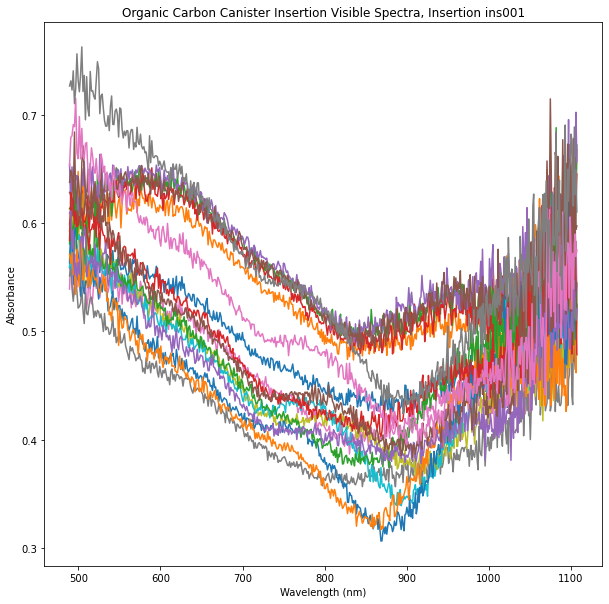

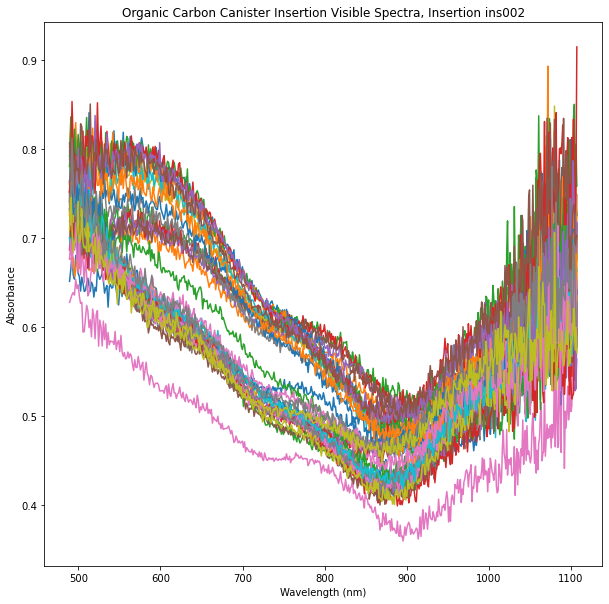

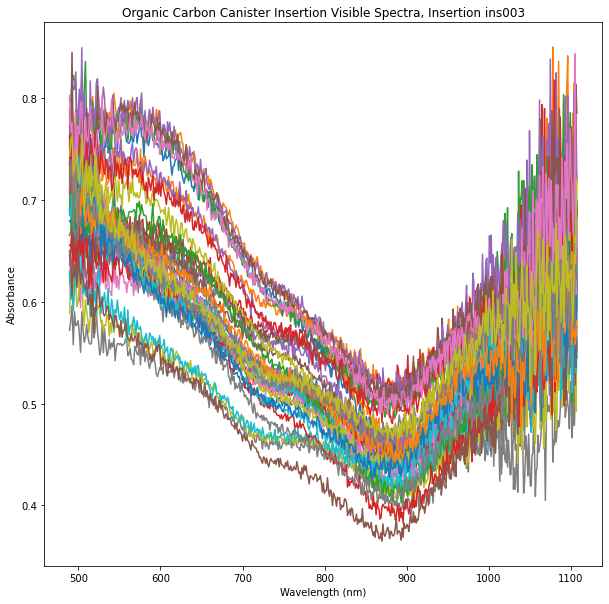

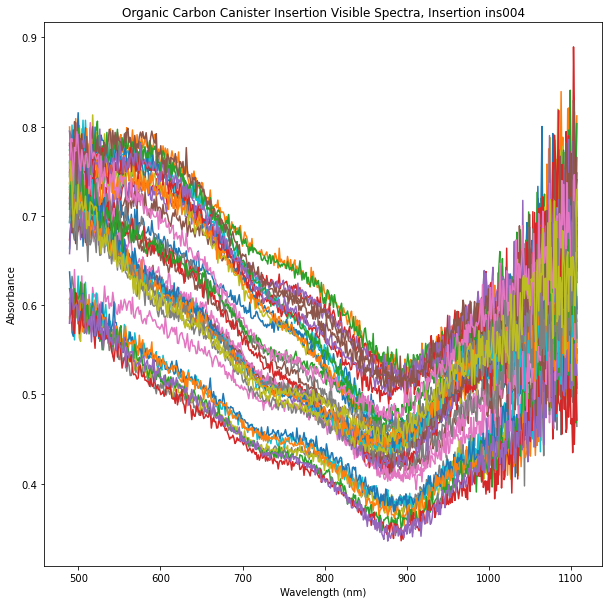

In [4]:
for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer1/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Organic Carbon Canister Insertion Visible Spectra, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        ax.plot(vis_waves, ins_abs[i, :])
    plt.show()

# FTIR Engine spectrometer

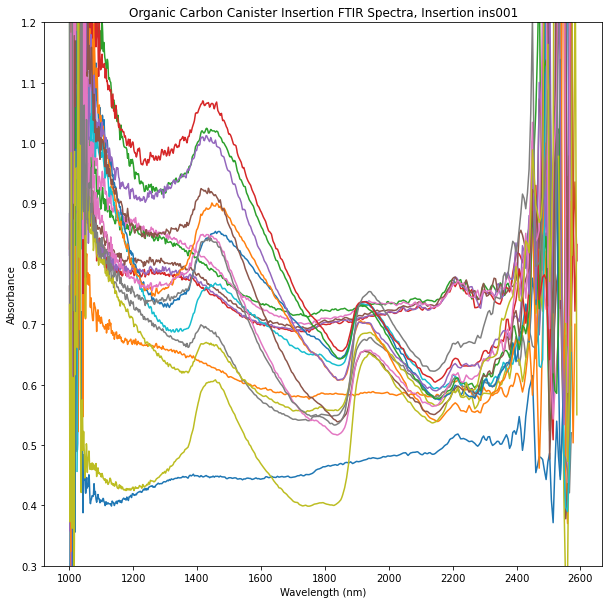

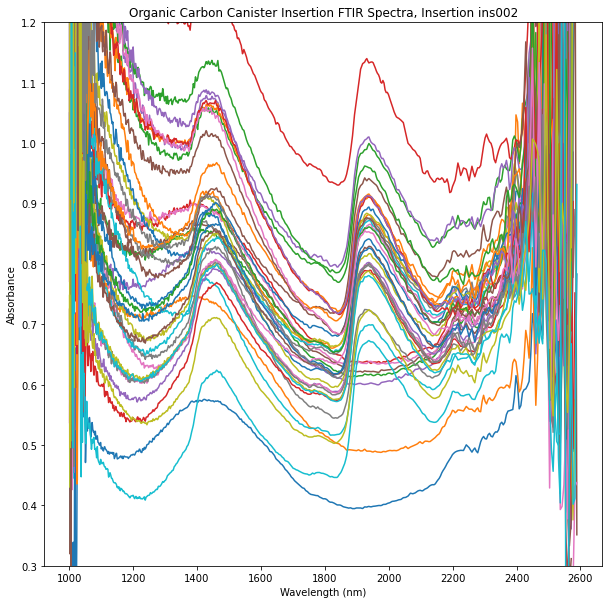

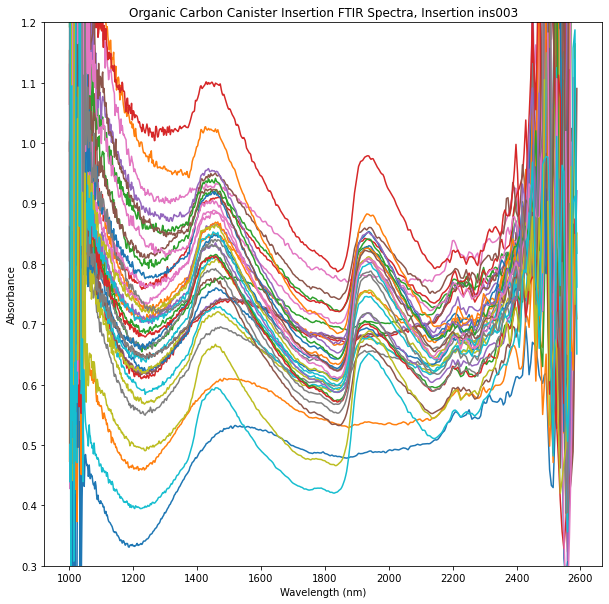

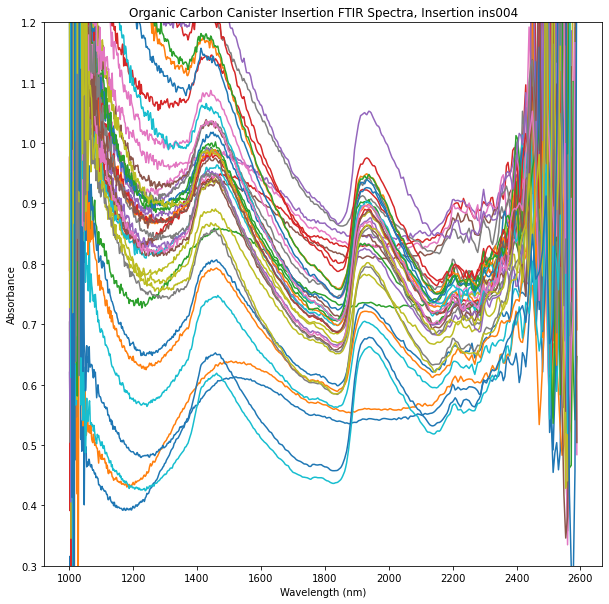

In [5]:
for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer2/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Organic Carbon Canister Insertion FTIR Spectra, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.3, 1.2)
    for i in range (ins_abs.shape[0]):
        ax.plot(ftir_waves, ins_abs[i, :])
    plt.show()

# Force by depth

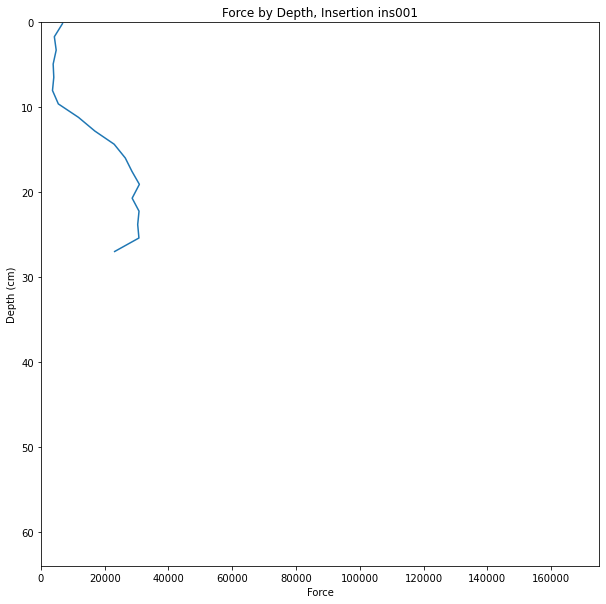

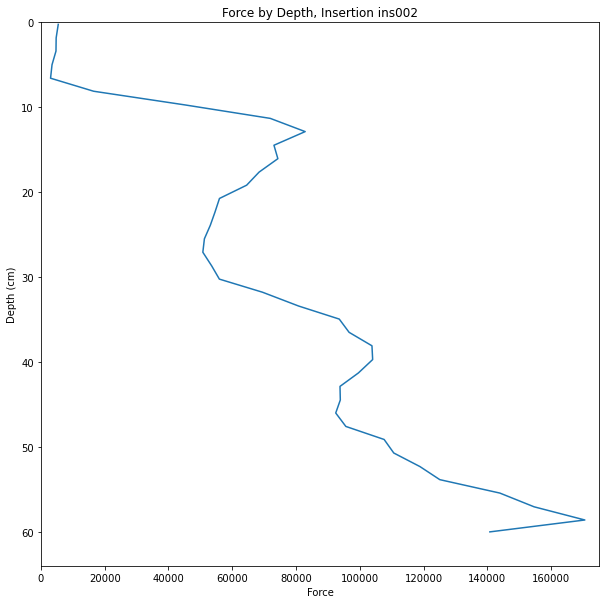

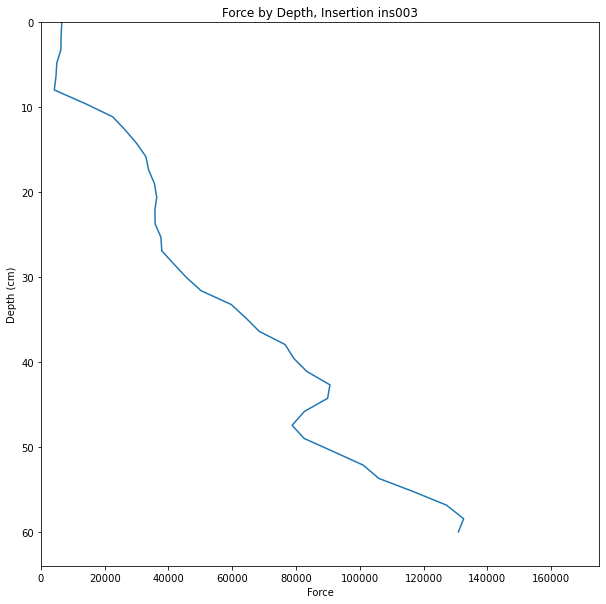

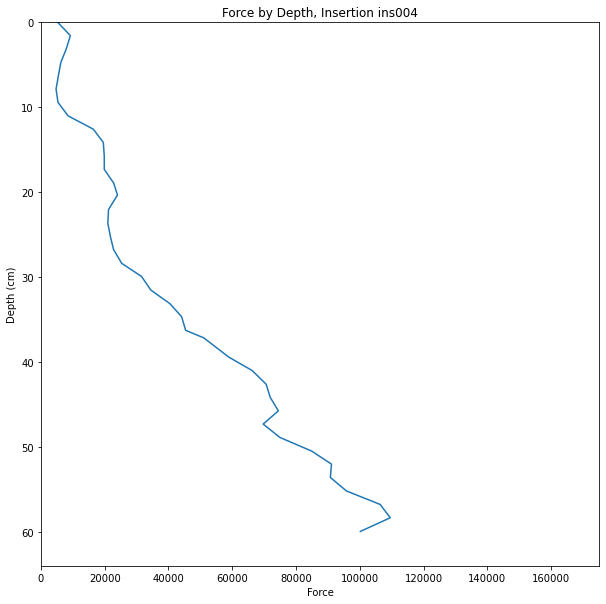

In [6]:
for insertion in insertions:
    ins_force = h5_file[f'session001/cal001/{insertion}/derived/absorbance_depth'][:, -2]
    ins_depth = h5_file[f'session001/cal001/{insertion}/derived/absorbance_depth'][:, -1]
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Force by Depth, Insertion {insertion}")
    ax.set_ylim(64.0, 0.0)
    ax.set_xlim(0, 175000)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Force")
    ax.plot(ins_force, ins_depth + 2 )

# Absorbance by depth for insertion 2 at selected wavelengths

In [7]:
abs2 = h5_file['session001/cal001/ins002/derived/absorbance_depth']
cols = vis_waves.astype(int).tolist()
cols = cols + ftir_waves.astype(int).tolist()
cols.append('force')
cols.append('depth')
ins2_abs_df = pd.DataFrame(data=abs2, columns=cols)
ins2_abs_df

489       490       492       493       495       496       498  \
0   0.651580  0.665030  0.681918  0.658369  0.654024  0.680661  0.673985   
1   0.677286  0.677281  0.673529  0.678640  0.656774  0.664015  0.686171   
2   0.732206  0.687474  0.712081  0.691001  0.731139  0.693000  0.688077   
3   0.686673  0.719943  0.686688  0.692019  0.698565  0.717388  0.704620   
4   0.700237  0.688507  0.704877  0.684609  0.695874  0.710475  0.677077   
5   0.733378  0.724786  0.689093  0.698522  0.715072  0.700978  0.687758   
6   0.627924  0.632339  0.636593  0.639002  0.636125  0.653664  0.643355   
7   0.752990  0.733489  0.730632  0.758711  0.767146  0.765611  0.740085   
8   0.781326  0.754636  0.751201  0.703376  0.715774  0.737351  0.716349   
9   0.700600  0.688851  0.710631  0.695087  0.730412  0.705701  0.695783   
10  0.741675  0.741591  0.756801  0.758315  0.785715  0.727611  0.755421   
11  0.736126  0.719943  0.764518  0.736326  0.713323  0.724413  0.729804   
12  0.752581  0.709330  0.712808  0.727022  0.754681  0.789622  0.716349   
13  0.740480  0.725161  0.749614  0.700595  0.762429  0.736622  0.762164   
14  0.798714  0.733489  0.779104  0.713608  0.737367  0.755604  0.749882   
15  0.742874  0.772661  0.716095  0.737079  0.766356  0.774262  0.759905   
16  0.748510  0.735405  0.763699  0.753201  0.751239  0.771096  0.756165   
17  0.764188  0.743152  0.799050  0.739725  0.738845  0.748435  0.756538   
18  0.760423  0.798070  0.808923  0.758315  0.798693  0.763281  0.768246   
19  0.754631  0.787122  0.797721  0.769539  0.799118  0.769915  0.754679   
20  0.792392  0.779831  0.817635  0.785672  0.789027  0.814167  0.788622   
21  0.802368  0.826476  0.811199  0.775261  0.808143  0.830131  0.777141   
22  0.737705  0.730822  0.694989  0.707933  0.742937  0.747687  0.700343   
23  0.719135  0.708247  0.720516  0.720082  0.698565  0.726543  0.697732   
24  0.752581  0.737714  0.751996  0.728497  0.729687  0.737716  0.708272   
25  0.741277  0.726663  0.763291  0.725185  0.710886  0.762894  0.738295   
26  0.764188  0.714421  0.748428  0.735199  0.757377  0.764056  0.713303   
27  0.750948  0.724412  0.757204  0.755554  0.757764  0.742488  0.732616   
28  0.762092  0.734255  0.748428  0.717913  0.753914  0.736986  0.741883   
29  0.764608  0.768499  0.752395  0.748920  0.762820  0.725122  0.747686   
30  0.744075  0.787554  0.769050  0.727022  0.739958  0.734080  0.759905   
31  0.725621  0.763965  0.760846  0.760696  0.781202  0.795004  0.785026   
32  0.780889  0.836534  0.828894  0.776498  0.822717  0.792512  0.793869   
33  0.751764  0.777287  0.853837  0.804183  0.794885  0.778251  0.778706   
34  0.788820  0.781963  0.795955  0.751250  0.747446  0.758276  0.762919   
35  0.807444  0.776021  0.812570  0.797635  0.746314  0.793341  0.775970   
36  0.676599  0.698970  0.666278  0.691679  0.686912  0.717737  0.678320   
37  0.732206  0.753034  0.812570  0.756735  0.734792  0.738447  0.706608   
38  0.709398  0.745503  0.710993  0.684276  0.696545  0.696639  0.707606   

         499       501       502  ...      2548      2553      2559      2565  \
0   0.660472  0.656999  0.640603  ...  0.961702  0.770294  0.793927  1.183925   
1   0.712865  0.665933  0.667971  ...  0.664708  0.504677  0.443642  0.452385   
2   0.684635  0.700465  0.709250  ...       NaN  0.859580  0.596335  0.496070   
3   0.699163  0.689876  0.716209  ...  0.631150  0.996190  0.874297  0.417382   
4   0.684014  0.692035  0.679831  ...       NaN  0.623502  0.397924  0.333033   
5   0.687752  0.688034  0.677491  ...  0.711534  0.623419  0.652653  0.875585   
6   0.647734  0.634488  0.626630  ...       NaN  1.833224  1.646615       NaN   
7   0.763801  0.778293  0.807024  ...       NaN  0.819282  0.602437  0.558978   
8   0.695007  0.738669  0.718767  ...       NaN  0.855912  0.675197  1.186473   
9   0.683085  0.718161  0.713348  ...  1.323161  1.275176  1.119276  0.898747   
10  0.726672  0.719147  0.756964  ...       NaN  0.732402  0.475319  0.620336

In [8]:
abs_waves = [501, 600, 701, 800, 900,  1400, 1501, 1800, 1902]

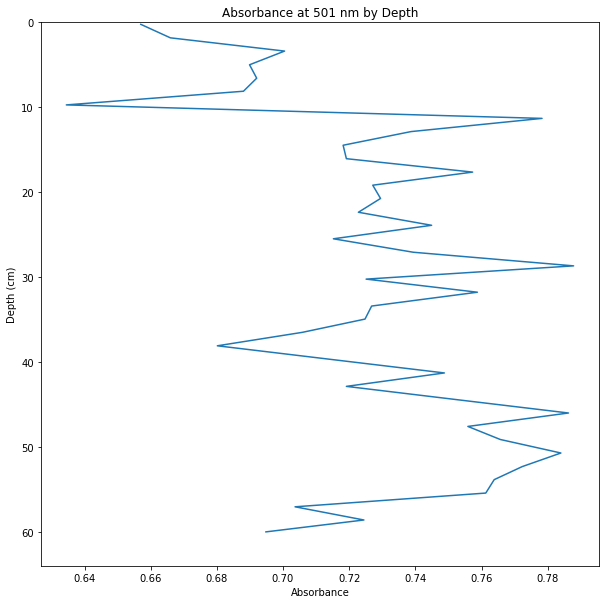

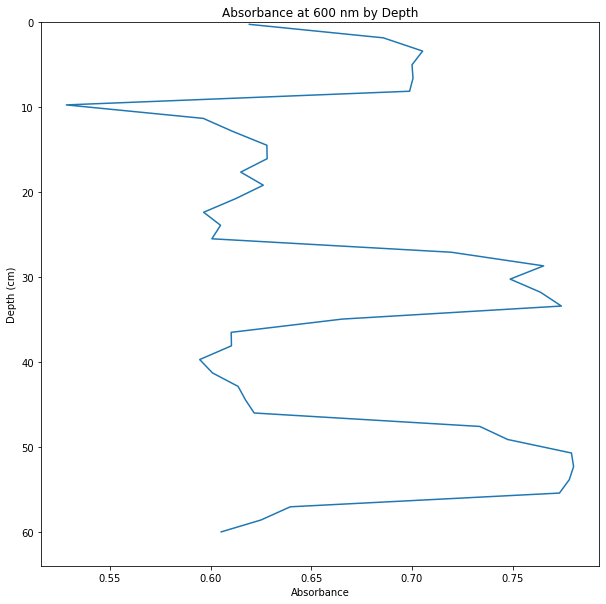

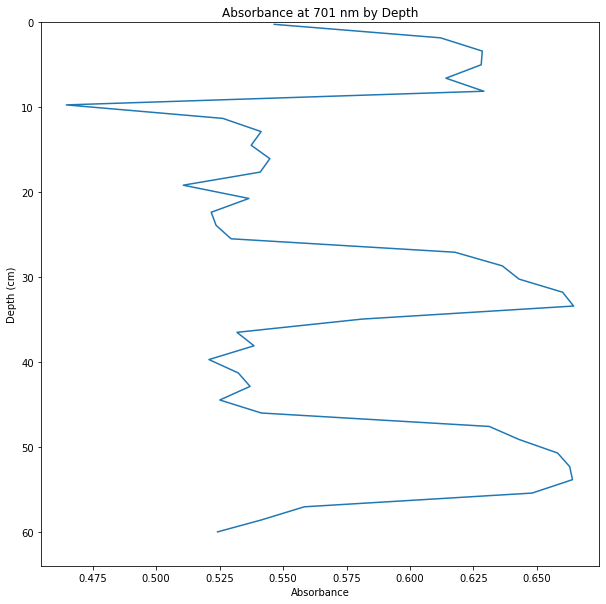

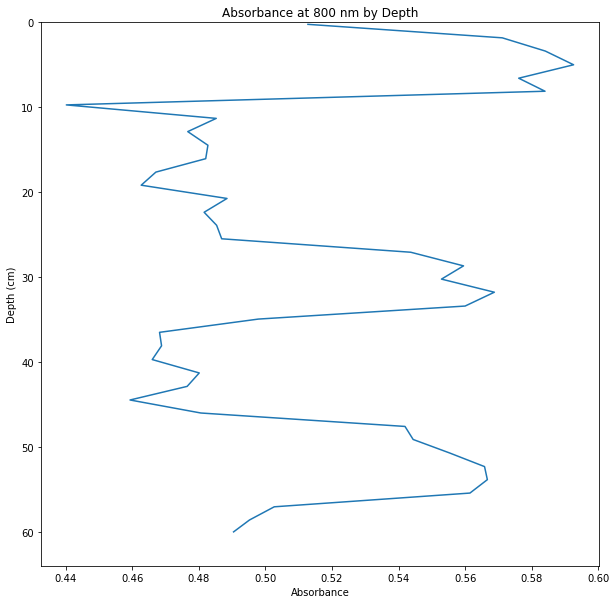

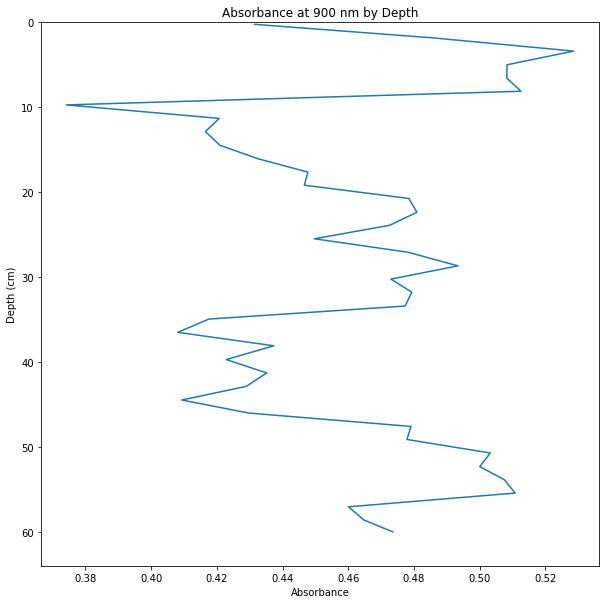

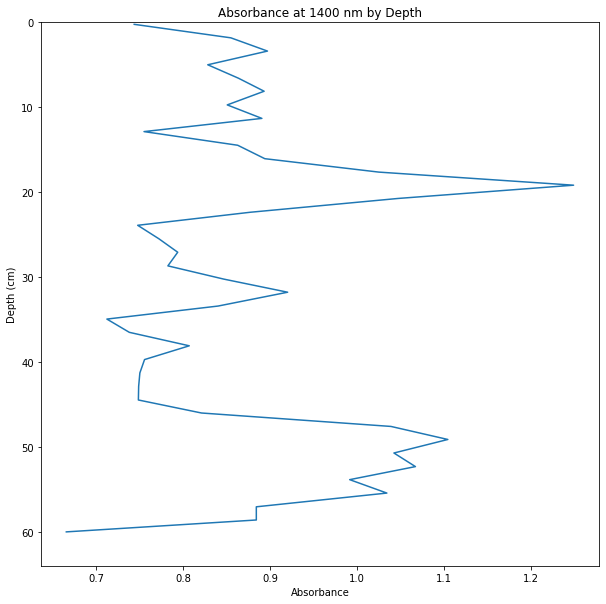

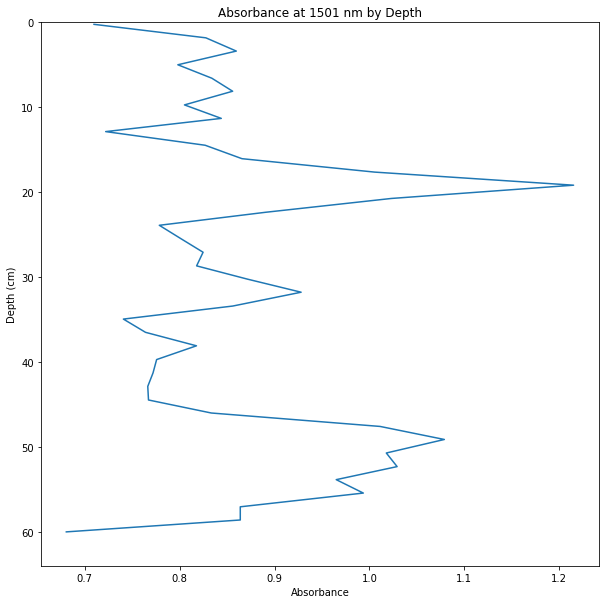

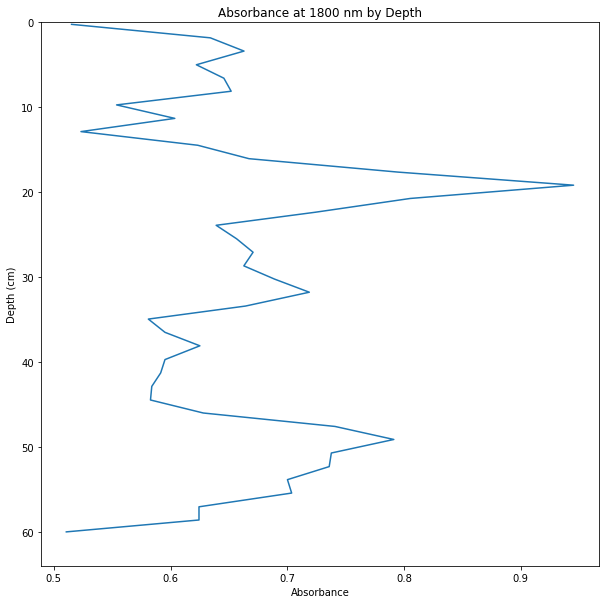

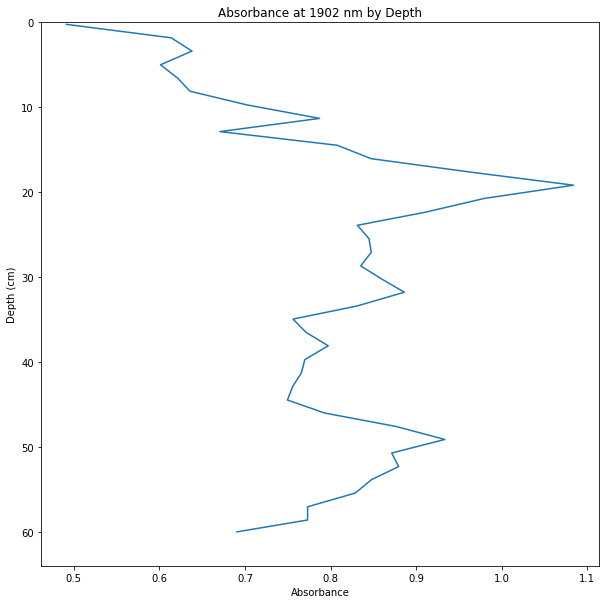

In [9]:
for i in range(len(abs_waves)):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Absorbance at {abs_waves[i]} nm by Depth")
    ax.set_ylim(64.0, 0.0)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Absorbance")    
    ax.plot(ins2_abs_df[abs_waves[i]], ins2_abs_df['depth'] + 2 );
    plt.show()

# Spectra of white test blank recorded with movement

Various methods of damping vibrations were tried for these spectra.  I was recording them mainly to test the ability of my program to record data, so I did not take notes as to which method was used for which spectra, or to test for reproducibility of results.  But the various methods did appear to affect the shape of the spectra.


In [10]:
h5_file.close()


In [11]:
file_name = "more_210406/blah5.h5"
h5_file = h5py.File(file_name, "r")

In [12]:
insertions = ['ins001', 'ins002']

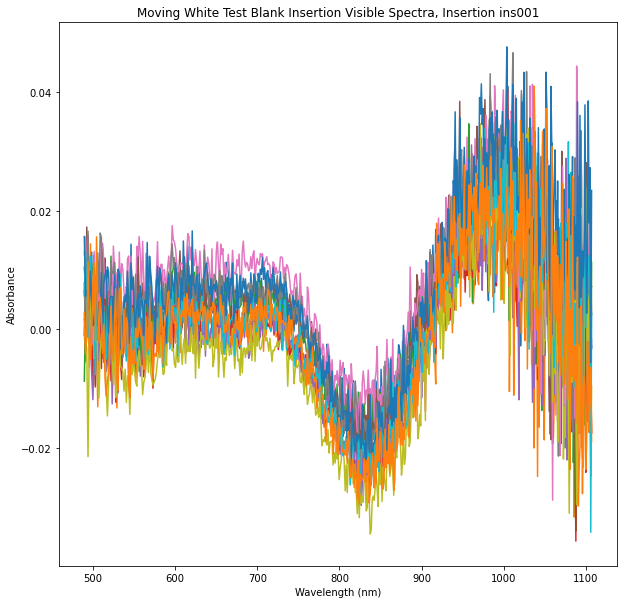

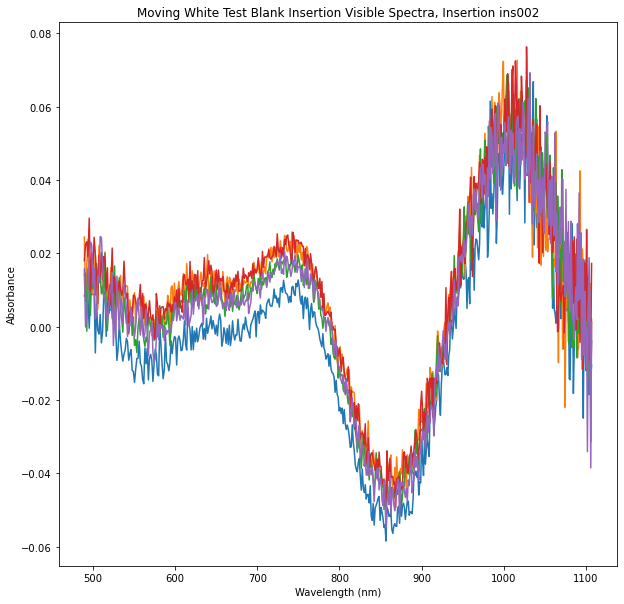

In [13]:
vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]

for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer1/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Moving White Test Blank Insertion Visible Spectra, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        ax.plot(vis_waves, ins_abs[i, :])
    plt.show()

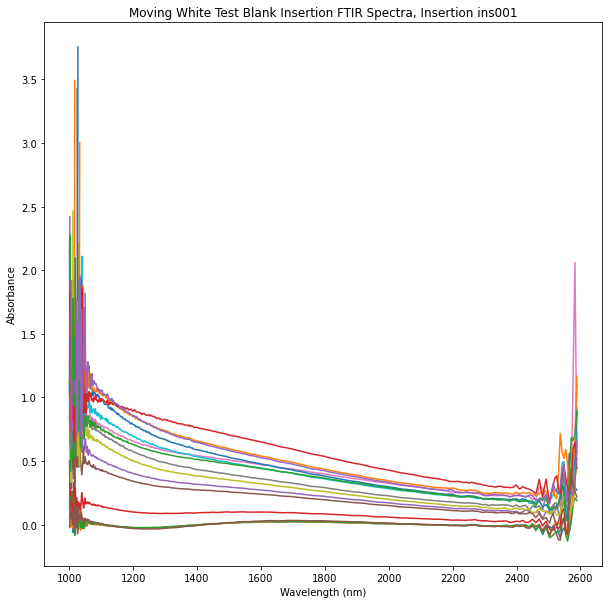

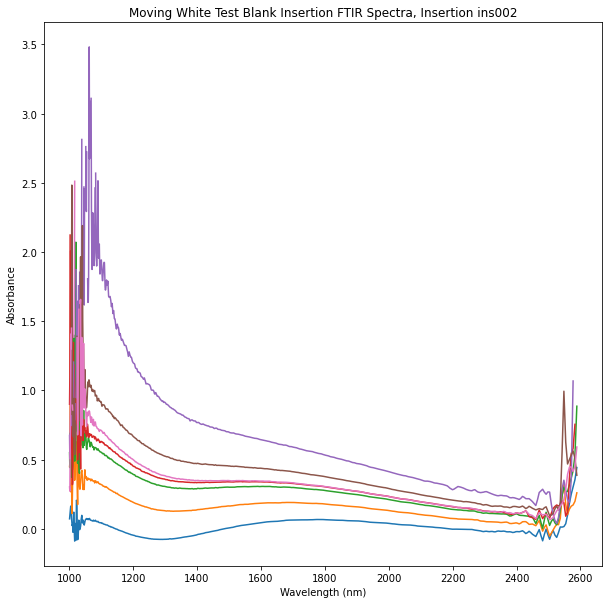

In [14]:
for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer2/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Moving White Test Blank Insertion FTIR Spectra, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        ax.plot(ftir_waves, ins_abs[i, :])
    plt.show()

In [15]:
h5_file.close()
file_name = "more_210406/blah3.h5"
h5_file = h5py.File(file_name, "r")

In [16]:
h5_file['session001/cal001/ins004'].keys()

<KeysViewHDF5 ['derived', 'encoder', 'load_cell', 'spectrometer1', 'spectrometer2']>

In [17]:
insertions = ['ins001', 'ins002', 'ins003', 'ins004']

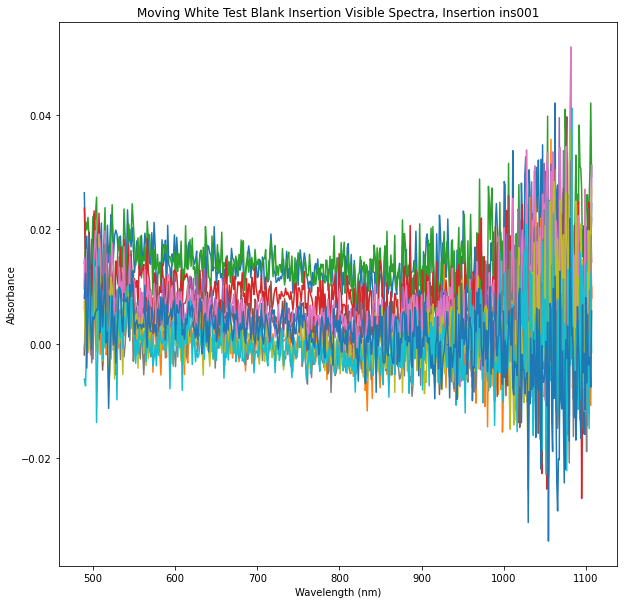

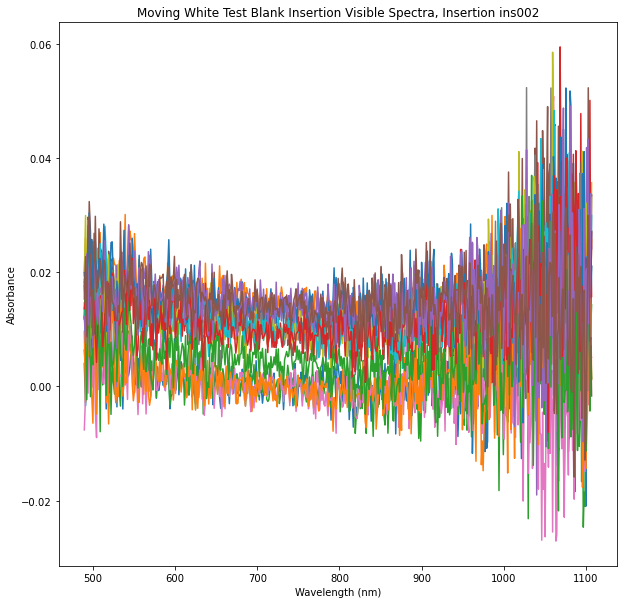

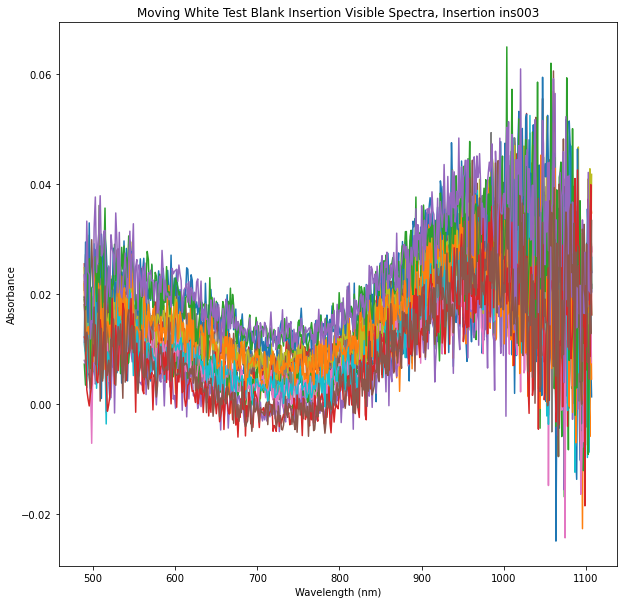

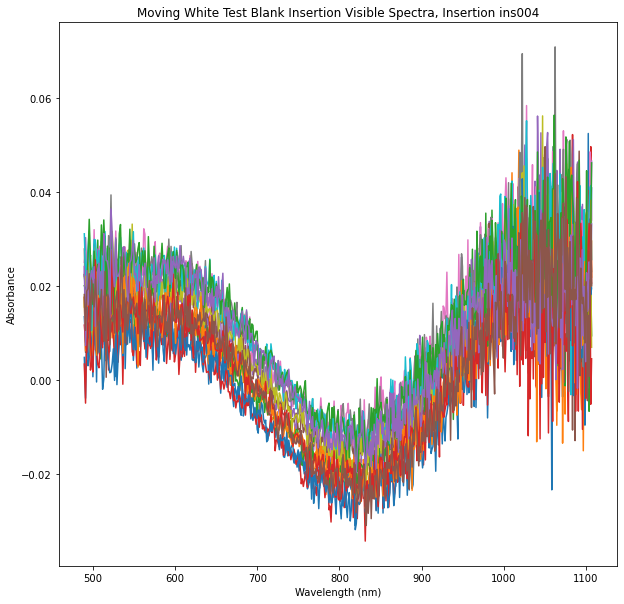

In [18]:
vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]

for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer1/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Moving White Test Blank Insertion Visible Spectra, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        ax.plot(vis_waves, ins_abs[i, :])
    plt.show()

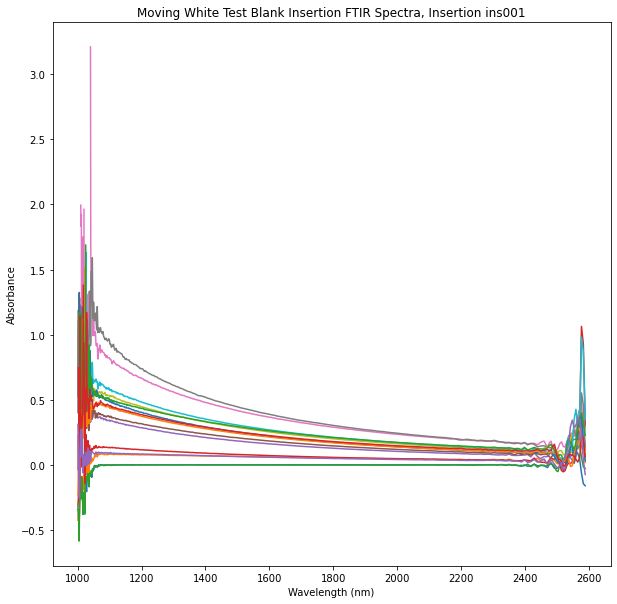

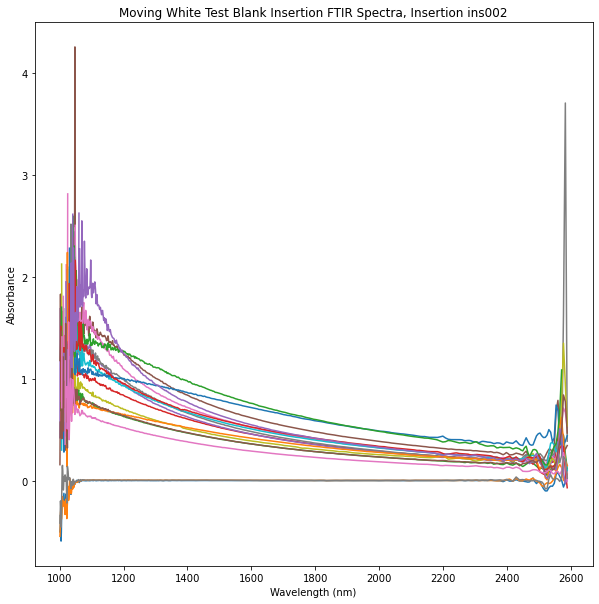

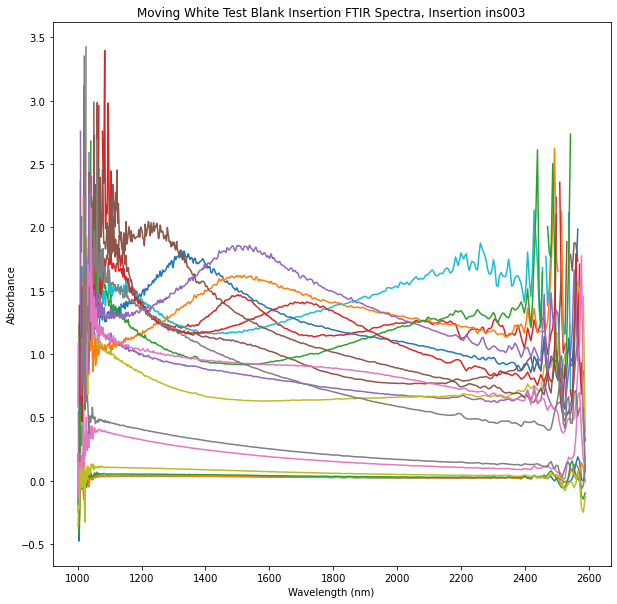

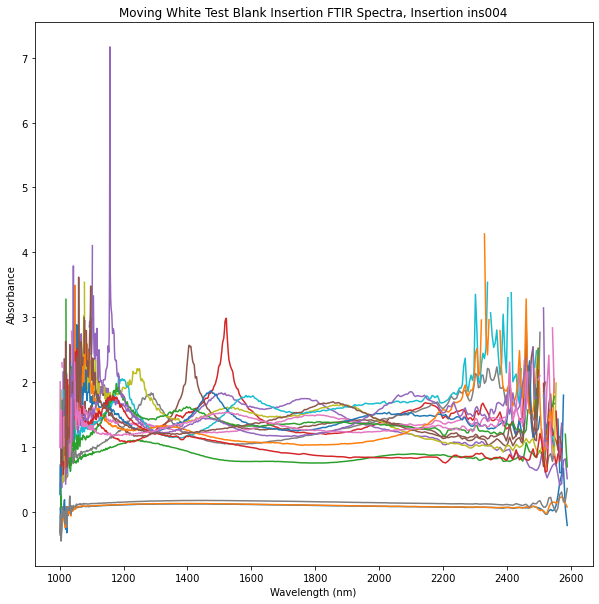

In [19]:
for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer2/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Moving White Test Blank Insertion FTIR Spectra, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        ax.plot(ftir_waves, ins_abs[i, :])
    plt.show()